In [1]:
#Importing libraries
import json, nltk
import regex as re
import pandas as pd
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
#from spacy import displacy
from pathlib import Path
nlp = spacy.load('en_core_web_sm')
import numpy as np
import csv
from collections import defaultdict

In [ ]:
#Saving cleaned learner / corrector sentence pairs into different files.
#Original Language Learner Data can be found/reuqested at: https://sites.google.com/site/naistlang8corpora/
#Cleaned sentence pairs were obtained using an extractor by Tomoya Mizumoto:
#(https://github.com/tomo-wb/Lang8-NAIST-extractor)

with open('thesis_data/082019_lang8_sp_eng_learner_cor_sents.txt', encoding = 'utf-8') as file:
    with open('thesis_data/20191010_clean_l8_learner_sents.txt','w', encoding = 'utf-8') as output:
        with open('thesis_data/20191010_clean_l8_cor_sents.txt', 'w', encoding = 'utf-8') as output_2:
            for line in file:
                line = line.strip('\n')
                line = line.split('\t')
                #some of the pairs did not separate by '\t', separated such instances manually
                #if len(line) == 1:
                    #print(line)
                output.write(str(line[0])+ '\n')
                output_2.write(str(line[1]+ '\n'))

In [ ]:
learner_sents = pd.read_csv('thesis_data/20191010_clean_l8_learner_sents.txt', error_bad_lines=False, 
                            names=["learner_sentences"])
corrector_sents = pd.read_csv('thesis_data/20191010_clean_l8_cor_sents.txt', error_bad_lines=False, 
                            names=["corrector_sentences"])

#disparity between shapes are due to the fact that not every correction recieved an edit
print("learner shape: ", learner_sents.shape, "correction shape: ", corrector_sents.shape)

In [ ]:
#comb = pd.concat([learner_sents, corrector_sents], axis=0, ignore_index=True)

In [ ]:
#splitting files by new line, the goal is to concatinate sentences with linguistic information provided by Spacy
#As well as with Error annotation information provided by ERRANT(https://github.com/chrisjbryant/errant)
with open("thesis_data/20191010_clean_l8_learner_sents.txt", encoding = 'utf-8') as fd:
    file = fd.read().splitlines()
    
with open("thesis_data/20191010_clean_l8_cor_sents.txt", encoding = 'utf-8') as fd_2:
    file_2 = fd_2.read().splitlines()

#reading in ERRANT output file:
with open("thesis_data/20191012_l8_sp_eng_m2", encoding = 'utf-8') as fd_3:
    file_3 = fd_3.read().splitlines()

In [ ]:
#Using spaCy in order to make a list of items containing dependencies and Part of speech (POS)
#information for each token in every learner/corrector pair
dep_file = []
dep_file_2 = []

for line in file:
    dep_sentence = nlp(line)
    deps = []
    for token in dep_sentence:
        l_tok = token.text + '_' + token.pos_ + '_' + token.dep_
        deps.append(l_tok)
    dep_file.append(deps)
    deps = []

for line_2 in file_2:
    dep_sentence_2 = nlp(line_2)
    deps_2 = []
    for token_2 in dep_sentence_2:
        c_tok = token_2.text + '_' + token_2.pos_ + '_' + token_2.dep_
        deps_2.append(c_tok)
    dep_file_2.append(deps_2)
    deps_2 = []

In [ ]:
#Handles cases in which extracted learner/corrector sentence was empty
for item in range(0, len(file)-1):
    if file[item] == ' ':
        file.pop(item)
        file_2.pop(item)
        dep_file.pop(item)
        dep_file_2.pop(item)

In [ ]:
#Appending learner sentence & error annotation to a list
e_list = []
currlist = []
#counter = 0

for line in open('thesis_data/20191012_l8_sp_eng_m2', encoding='utf-8'):
    line = line.rstrip()
    if line == '':
        if currlist != []:
            #print(currlist)
            e_list.append(currlist)
            #counter += 1
        currlist = []
        continue
    currlist.append(line)

In [ ]:
e_list[55]

In [ ]:
#Creating Data object to store in JSON format
#This object holds: original learner / corrector sentences, linguistic information for both, and error annotations
#if any corrections were made
m_l_object = [list(pair) for pair in zip(file, dep_file, file_2,dep_file_2,e_list)]
data = m_l_object

with open('20200129_l8_eng_sp_error_output.json', 'w', encoding='utf-8') as outfile:
    json.dump(data, outfile)

In [2]:
with open('20200129_l8_eng_sp_error_output.json') as json_file:
    m_l_object = json.load(json_file)

In [3]:
#Instance of one object
m_l_object[50]

['A soft whimper breaks the silence.',
 ['A_DET_det',
  'soft_ADJ_amod',
  'whimper_NOUN_nsubj',
  'breaks_VERB_ROOT',
  'the_DET_det',
  'silence_NOUN_dobj',
  '._PUNCT_punct'],
 'A soft whimper breaks the silence.',
 ['A_DET_det',
  'soft_ADJ_amod',
  'whimper_NOUN_nsubj',
  'breaks_VERB_ROOT',
  'the_DET_det',
  'silence_NOUN_dobj',
  '._PUNCT_punct'],
 ['S A soft whimper breaks the silence.',
  'A -1 -1|||noop|||-NONE-|||REQUIRED|||-NONE-|||0']]

In [4]:
pn_l8 = pd.DataFrame(m_l_object, columns=['learner_sentence', 'learner_dependencies', 'corrections', 'corrector_dependencies'
                                      , 'error_annotations'])
pn_l8.head()

,learner_sentence,learner_dependencies,corrections,corrector_dependencies,error_annotations
0,he's still waiting for her to come back,"[he_PRON_nsubj, 's_AUX_aux, still_ADV_advmod, ...",he's still waiting for her to come back,"[he_PRON_nsubj, 's_AUX_aux, still_ADV_advmod, ...","[S he's still waiting for her to come back, A ..."
1,He wasn't able to remember their first kiss.,"[He_PRON_nsubj, was_AUX_ROOT, n't_PART_neg, ab...",He wasn't able to remember their first kiss.,"[He_PRON_nsubj, was_AUX_ROOT, n't_PART_neg, ab...",[S He wasn't able to remember their first kiss...
2,She would have done.,"[She_PRON_nsubj, would_AUX_aux, have_AUX_aux, ...",She would have done.,"[She_PRON_nsubj, would_AUX_aux, have_AUX_aux, ...","[S She would have done., A -1 -1|||noop|||-NON..."
3,He couldn't remember the first time they made ...,"[He_PRON_nsubj, could_VERB_aux, n't_PART_neg, ...",He couldn't remember the first time they made ...,"[He_PRON_nsubj, could_VERB_aux, n't_PART_neg, ...",[S He couldn't remember the first time they ma...
4,She would have done.,"[She_PRON_nsubj, would_AUX_aux, have_AUX_aux, ...",She would have done.,"[She_PRON_nsubj, would_AUX_aux, have_AUX_aux, ...","[S She would have done., A -1 -1|||noop|||-NON..."


Unique Learner Sentences:  25974
Total number of sentences with annotations:  10850
Total number of sentences w/o annotations:  15124
Total number of annotations:  12883
% of sentences annotated:  41.77254177254177
Average number of annotations per sentence:  1.187373271889401


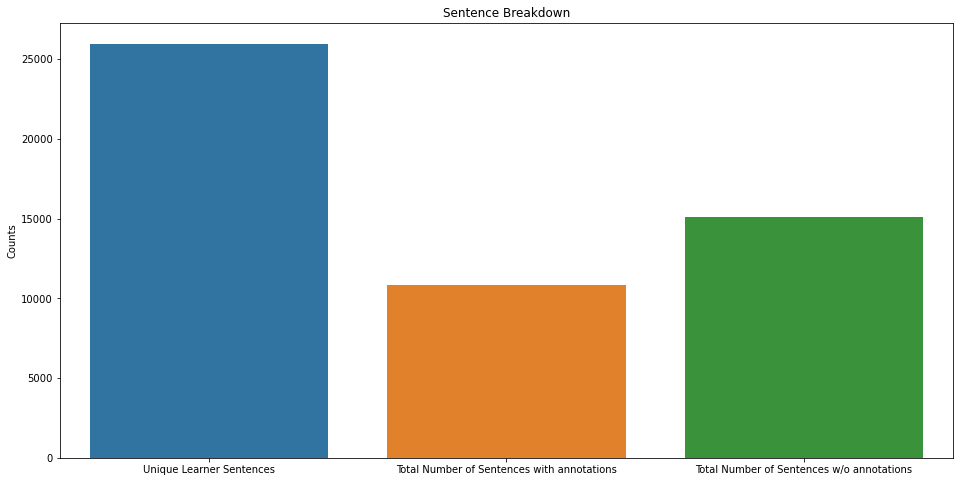

In [5]:
#How many learner sentences have annotations?

#initializing a dictionary of total number of learner sentences
l_sents = defaultdict(int)
#initializing a dictionary of annotated sentences
annot_sents = defaultdict(int)
#total_annotations
total_annots = 0

for i in range(0, len(m_l_object)):
    s = m_l_object[i][0]
    l_sents[s]+=1
    #instances in entry was empty
    if i == 6623 or i == 9415 or i == 24820:
        continue
    no_op_search = re.search(r'\|\|\|(noop)\|\|\|', m_l_object[i][4][1])
    if not no_op_search:
        annot_sents[s]+=1
        total_annots += 1        

    
print("Unique Learner Sentences: ", len(l_sents.keys()))
print("Total number of sentences with annotations: ", len(annot_sents.keys()))
print('Total number of sentences w/o annotations: ', 
      len(l_sents.keys()) - len(annot_sents.keys()))
print("Total number of annotations: ", total_annots)
print("% of sentences annotated: ", len(annot_sents.keys())/len(l_sents.keys())*100)
print("Average number of annotations per sentence: ", total_annots/len(annot_sents.keys()))

l_c_dict = {
            'Unique Learner Sentences': len(l_sents.keys()),
            'Total Number of Sentences with annotations': len(annot_sents.keys()),
            'Total Number of Sentences w/o annotations':  len(l_sents.keys()) - len(annot_sents.keys()),
           }

l_c_data = pd.Series(l_c_dict).to_frame('Counts')
plt.figure(figsize=(16, 8))
plt.title('Sentence Breakdown')
sns.barplot(x=l_c_data.index, y=l_c_data['Counts'])

In [6]:
#Target pronoun list that will be stored and tracked for in a dictionary
pronouns = '(I|me|we|us|he|him|she|her|it|they|them)'
pro_types = '(M:PRON|R:PRON|U:PRON)'
pronoun_type_counter = defaultdict(lambda: defaultdict(int))
#pronoun_counter = defaultdict(int)

for item in m_l_object:
    #learner sentence
    l_t = str(item[0])
    #learner sentence dependencies
    l_d = item[1]
    #corrector sentence
    c_t = str(item[2])
    #corrector sentence dependencies
    c_d = item[3]
    
    for e in item[4]:
        pro_target = re.search(r'\|\|\|' + pro_types + r'\|\|\|' 
                               + r'.*\b(?i)' + pronouns + r'\b.*\|\|\|', e)
        if pro_target:
            anno_type = pro_target.group(1)
            current_pronoun = pro_target.group(2).lower()
            pronoun_type_counter[anno_type][current_pronoun] += 1
            

for a in pronoun_type_counter.keys():
    total = 0
    for p in pronoun_type_counter[a].keys():
        total += pronoun_type_counter[a][p]
        print(a,p,pronoun_type_counter[a][p])
    print(a, 'total: ', total)

M:PRON she 15
M:PRON i 88
M:PRON it 293
M:PRON they 27
M:PRON he 16
M:PRON we 11
M:PRON me 18
M:PRON him 2
M:PRON them 18
M:PRON us 3
M:PRON total:  491
R:PRON it 109
R:PRON i 115
R:PRON we 10
R:PRON me 13
R:PRON they 46
R:PRON he 12
R:PRON her 12
R:PRON them 29
R:PRON she 10
R:PRON us 2
R:PRON total:  358
U:PRON it 1
U:PRON i 1
U:PRON total:  2


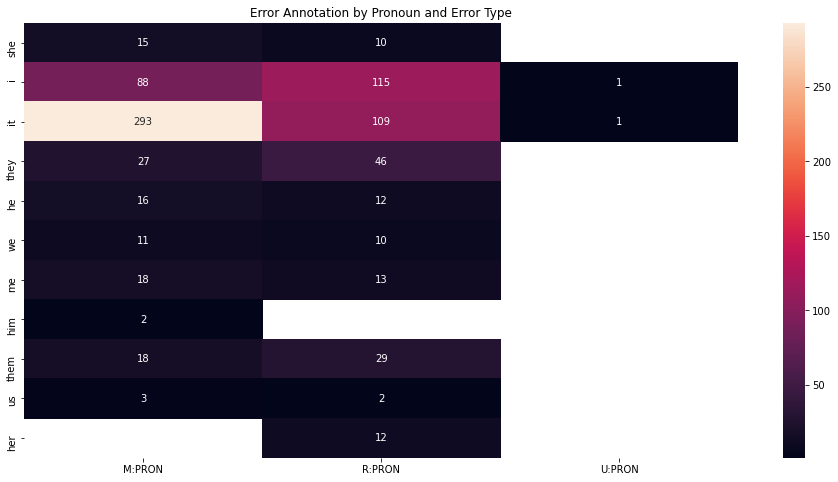

In [24]:
pt_df = pd.DataFrame(pronoun_type_counter)
plt.figure(figsize=(16, 8))
plt.title('Error Annotation by Pronoun and Error Type')
sns.heatmap(data=pt_df, annot=True, fmt='g')